Overview:

This report presents investigation of baseball data. It is a data set containing complete batting and pitching statistics from 1871 to 2016, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This project focuses on the unique salary structure of baseball. Following questions are explored: 1) Determing the salary structure of baseball, what factors drive a players salary. 2) Determining a relationship between player’s performance and salary. 3) What are the characteristics of some fo the highest earning pitchers and batters.

To take into consideration inflation, data of last 10 years is used for the calculations. Baseball has three player positions, of batter, pitcher and fielder. Here only batter and pitcher positions will be considered. Performance metrics used for batters are hits, home runs, batting average and runs batted in, and the performance metrics used for pitchers are earned runs average per 9 innings, striker outs, wins credited to the pitcher and loses credited to a pitcher.



The tables used for this report are: Master, Batting, Pitching, Salaries.

In [1]:
# importing libraries needed for the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
import scipy as sp


#reading the data files using pandas csv reader
master = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/master.csv')
batting = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/batting.csv')
pitching = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/pitching.csv')
salaries = pd.read_csv('D:/Maitrayee/1DataScience/Udacity/P2/salaries.csv')

Data Wrangling:



The code below performs data wrangling. First, data from only the columns of interest is pulled from the main tables into new data frames called batting_df, pitching_df and salaries_df. The batting average for batters and earned runs average for pitchers is then calculated and added in new column in batting_df and pitching_df respectively. The data from salaries_df table is merged into the batting_df and pitching_df to get the players salary for each year.



Then data is cleaned to element all the NAN values, since salaries, batting avergae ad earned runs average that are null are not considered for correlation calculations.

In [2]:
years =  pd.Series(range(2007,2017)) #considering analysis for last 10 years

# selecting only the columns required for batters metrics
colsB = ['playerID','yearID','teamID','lgID','G','R','H','HR','AB','RBI'] 

# selecting only the columns required for pitchers metrics
colsP = ['playerID','yearID','teamID','lgID','G','IPouts','ER','W','L','SO']

# buliding batters data frame
batting_df = pd.DataFrame(batting.loc[batting['yearID'].isin(years)], columns=colsB)
batting_df.loc[:,'BA'] = batting_df['H']/batting_df['AB']

# bulinding pithcers data frame
pitching_df = pd.DataFrame(pitching.loc[pitching['yearID'].isin(years)], columns=colsP)
pitching_df.loc[:,'ERA'] = (pitching_df['ER']/pitching_df['IPouts'])*9

# bulinding pithcers data frame
salaries_df = pd.DataFrame(salaries.loc[salaries['yearID'].isin(years)])

# Merging batting and pitching data with the players salary data
batting_sal = pd.merge(batting_df, salaries_df, how='left', on=['yearID', 'playerID', 'teamID','lgID'])
pitching_sal = pd.merge(pitching_df, salaries_df, how='left', on=['yearID', 'playerID', 'teamID','lgID'])



In [3]:
# Checking the number of null values in each column.
print (batting_sal.isnull().sum())

print (pitching_sal.isnull().sum())

playerID       0
yearID         0
teamID         0
lgID           0
G              0
R              0
H              0
HR             0
AB             0
RBI            0
BA          4004
salary      6379
dtype: int64
playerID       0
yearID         0
teamID         0
lgID           0
G              0
IPouts         0
ER             0
W              0
L              0
SO             0
ERA            3
salary      3529
dtype: int64


In [4]:
# dropping the null values
batting_sal = batting_sal.dropna(subset=['salary', 'BA'])

pitching_sal = pitching_sal.dropna(subset=['salary', 'ERA'])


Data Investigation:

First, the distrubution of salary of all batters and pitchers over the ten years is plotted and comapred. Then to get the relation between each performance metric and salary, a correlation coefficient is calculated between each and plotted.

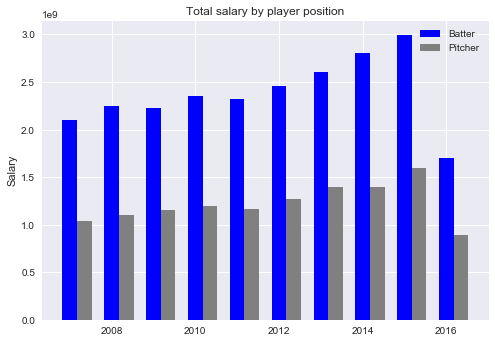

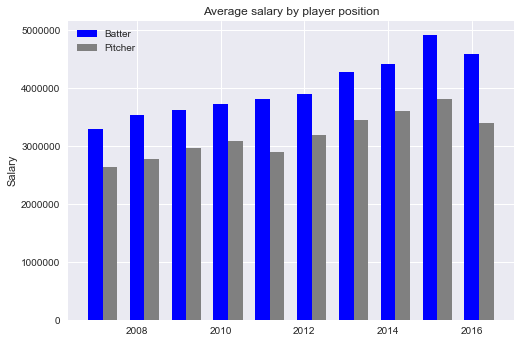

Total number of batters and their salary each year
              salary  players
yearID                       
2007    2.097847e+09      636
2008    2.245237e+09      635
2009    2.229082e+09      614
2010    2.355765e+09      633
2011    2.324557e+09      611
2012    2.457492e+09      631
2013    2.602429e+09      609
2014    2.809043e+09      637
2015    2.993998e+09      609
2016    1.699442e+09      370
Total number of pitchers and their salary each year
              salary  players
yearID                       
2007    1.043405e+09      396
2008    1.100153e+09      396
2009    1.150911e+09      388
2010    1.200360e+09      388
2011    1.160868e+09      400
2012    1.271703e+09      398
2013    1.391262e+09      404
2014    1.392267e+09      387
2015    1.591514e+09      417
2016    8.912392e+08      262


In [11]:
# distribution of batter and pitcher salary

# grouping data by year and adding player salaries
batting_dist = pd.DataFrame(batting_sal.groupby('yearID').sum(), columns = ['salary'])
pitching_dist = pd.DataFrame(pitching_sal.groupby('yearID').sum(), columns = ['salary'])

#Calculating number of players in each year
batting_dist_count = pd.DataFrame(batting_sal.groupby('yearID').count(), columns = ['playerID'])
pitching_dist_count = pd.DataFrame(pitching_sal.groupby('yearID').count(), columns = ['playerID'])

#making on dataframe with total salary and total number of players for each year
batting_dist = pd.concat([batting_dist, batting_dist_count], axis=1)
pitching_dist = pd.concat([pitching_dist, pitching_dist_count], axis=1)

batting_dist.rename(columns={'playerID': 'players'}, inplace=True)
pitching_dist.rename(columns={'playerID': 'players'}, inplace=True)

  
#bar plot salary distribution
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(batting_dist.index.values, (batting_dist.salary), width, color='blue')
rects2 = ax.bar(pitching_dist.index.values + width, (pitching_dist.salary), width, color='gray')
ax.set_ylabel('Salary')
ax.set_title('Total salary by player position')
ax.legend((rects1[0], rects2[0]), ('Batter', 'Pitcher'))
plt.show()

width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(batting_dist.index.values, (batting_dist.salary/batting_dist.players), width, color='blue')
rects2 = ax.bar(pitching_dist.index.values + width, (pitching_dist.salary/pitching_dist.players), width, color='gray')
ax.set_ylabel('Salary')
ax.set_title('Average salary by player position')
ax.legend((rects1[0], rects2[0]), ('Batter', 'Pitcher'))
plt.show()

print('Total number of batters and their salary each year')
print(batting_dist.head(11))

print('Total number of pitchers and their salary each year')
print(pitching_dist.head(11))


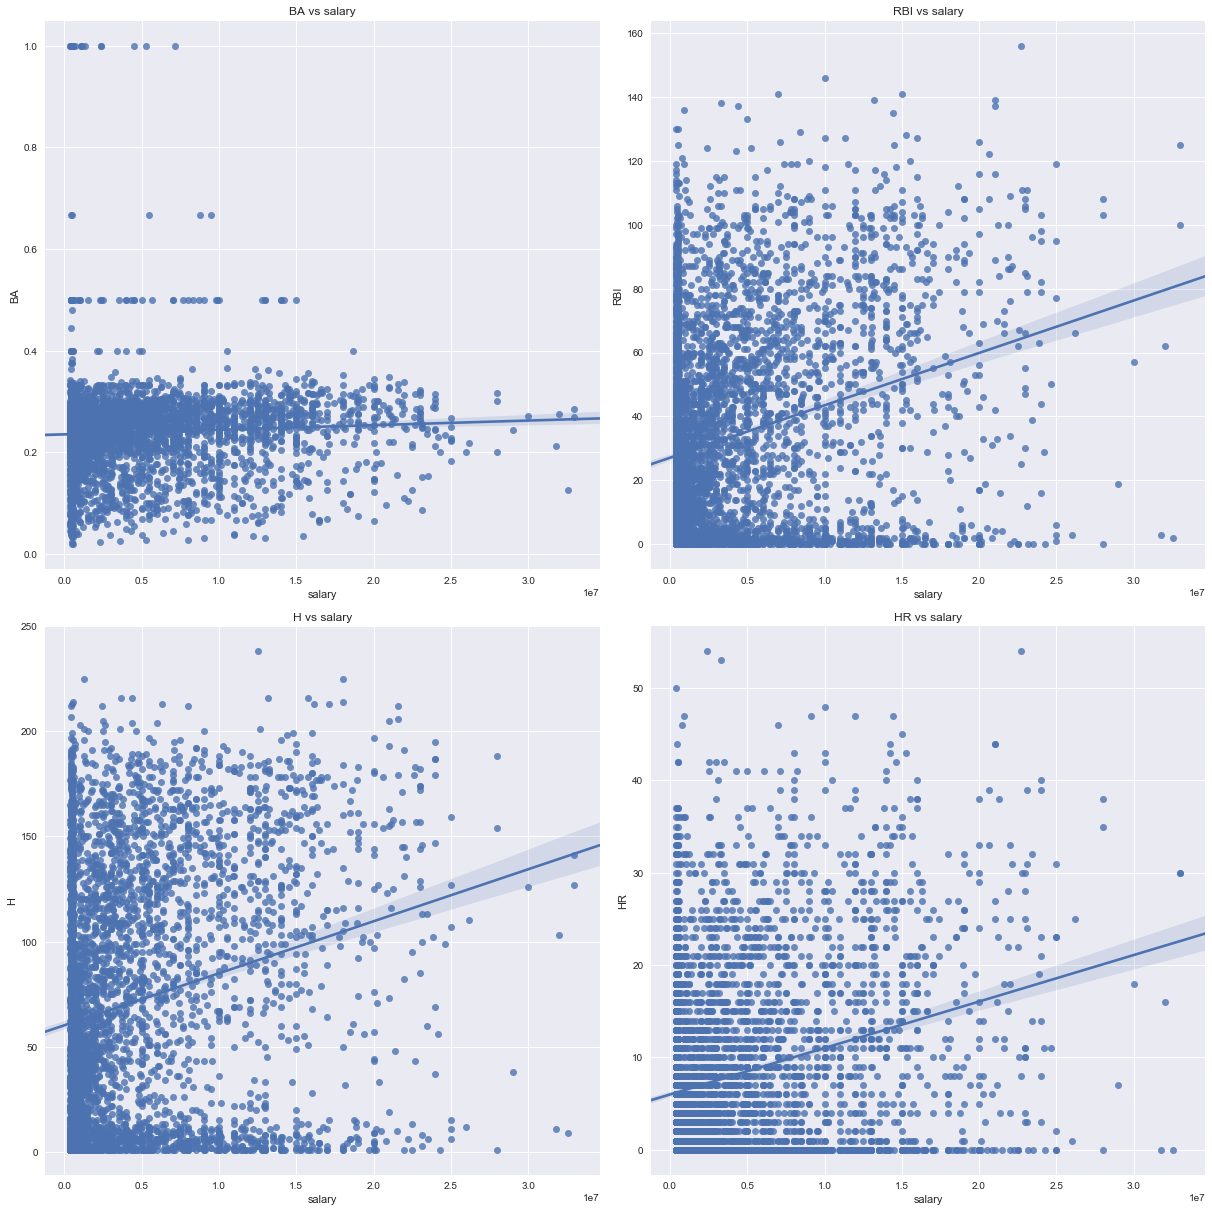

In [6]:
#shrinking data frame and choosing only players with grater than 0$ salary. 

colBC = ['H','HR','BA','RBI','salary']

batting_corr = pd.DataFrame(batting_sal.loc[(batting_sal['salary']!=0) & (batting_sal['BA']!=0)], columns=colBC)

fig = plt.figure(figsize=(17,17))
fig.add_subplot(221)
sns.regplot(x=batting_corr.salary, y=batting_corr.BA, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('BA');
plt.title('BA vs salary');

fig.add_subplot(222)
sns.regplot(x=batting_corr.salary, y=batting_corr.RBI, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('RBI');
plt.title('RBI vs salary');

fig.add_subplot(223)
sns.regplot(x=batting_corr.salary, y=batting_corr.H, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('H');
plt.title('H vs salary');

fig.add_subplot(224)
sns.regplot(x=batting_corr.salary, y=batting_corr.HR, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('HR');
plt.title('HR vs salary');

fig.tight_layout()
plt.show()

  


In [7]:
# Pearson correlation

r_value, p_value,= sp.stats.pearsonr(batting_corr["salary"],batting_corr["BA"])
print ('Correlation coefficient between salary and BA')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(batting_corr["salary"],batting_corr["RBI"])
print ('Correlation coefficient between salary and RBI')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(batting_corr["salary"],batting_corr["H"])
print ('Correlation coefficient between salary and H')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(batting_corr["salary"],batting_corr["HR"])
print ('Correlation coefficient between salary and HR')
print (r_value)



Correlation coefficient between salary and BA
0.0543433038168
Correlation coefficient between salary and RBI
0.271586715678
Correlation coefficient between salary and H
0.218416617868
Correlation coefficient between salary and HR
0.275076545276


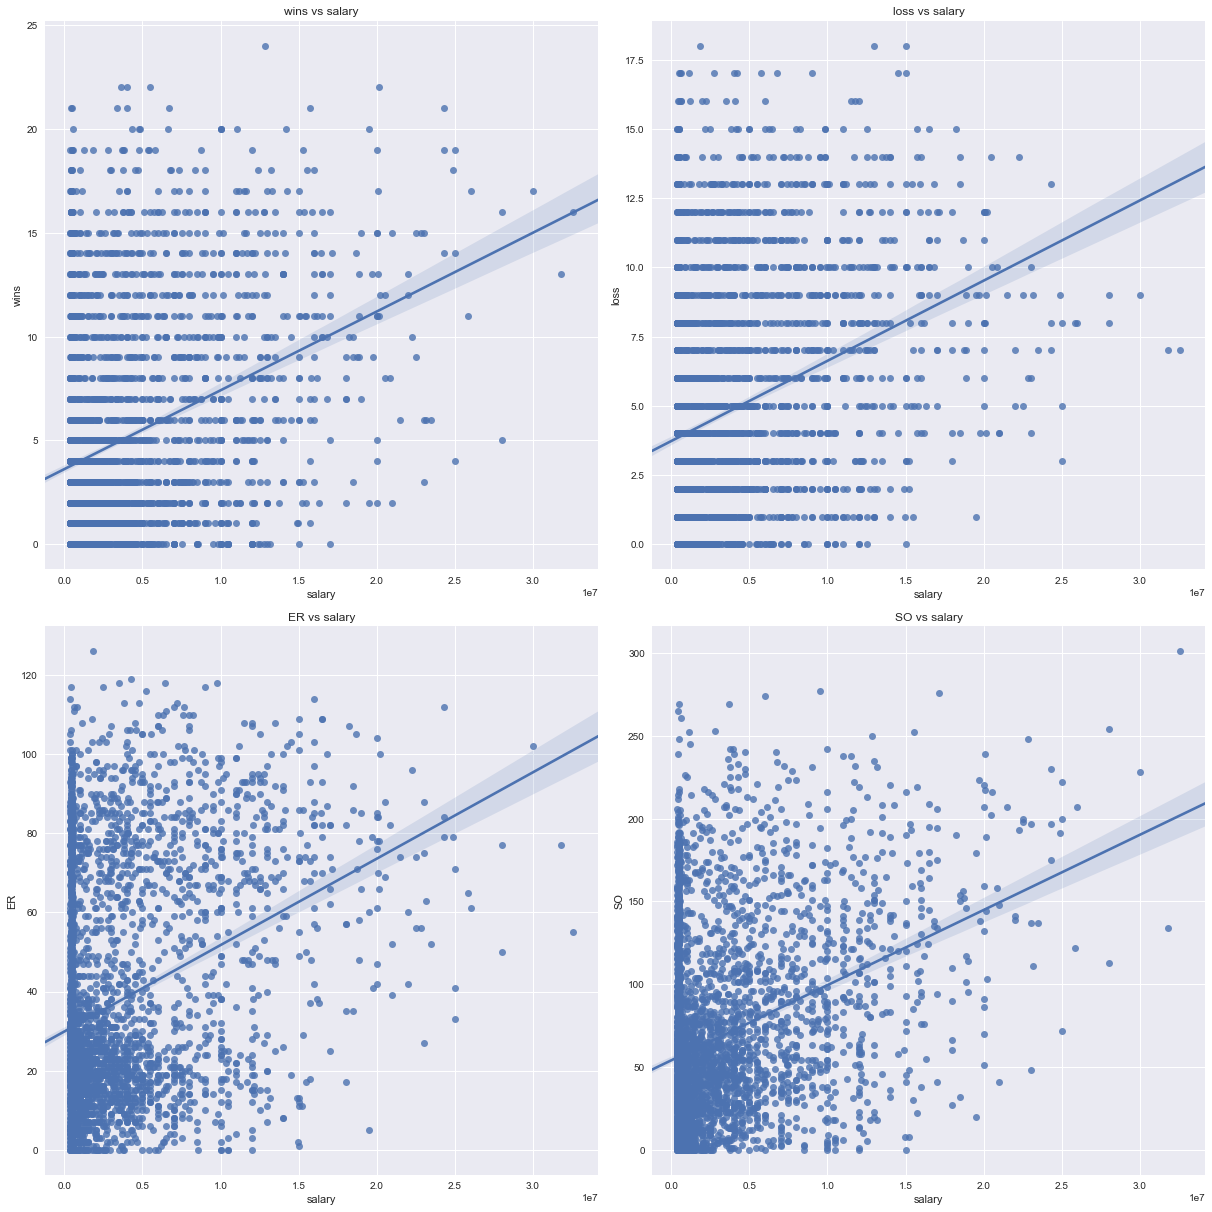

In [8]:
colPC = ['ER','W','L','SO','salary']

pitching_corr = pd.DataFrame(pitching_sal.loc[(pitching_sal['salary']!=0)], columns=colPC)

fig = plt.figure(figsize=(17,17))
fig.add_subplot(221)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.W, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('wins');
plt.title('wins vs salary');

fig.add_subplot(222)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.L, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('loss');
plt.title('loss vs salary');

fig.add_subplot(223)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.ER, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('ER');
plt.title('ER vs salary');

fig.add_subplot(224)
sns.regplot(x=pitching_corr.salary, y=pitching_corr.SO, fit_reg=True);
plt.xlabel('salary');
plt.ylabel('SO');
plt.title('SO vs salary');

fig.tight_layout()
plt.show()


In [9]:
# Pearson correlation

r_value, p_value,= sp.stats.pearsonr(pitching_corr["salary"],pitching_corr["ER"])
print ('Correlation coefficient between salary and ER')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(pitching_corr["salary"],pitching_corr["SO"])
print ('Correlation coefficient between salary and SO')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(pitching_corr["salary"],pitching_corr["W"])
print ('Correlation coefficient between salary and W')
print (r_value)

r_value, p_value,= sp.stats.pearsonr(pitching_corr["salary"],pitching_corr["L"])
print ('Correlation coefficient between salary and L')
print (r_value)

Correlation coefficient between salary and ER
0.325798285187
Correlation coefficient between salary and SO
0.355736896118
Correlation coefficient between salary and W
0.345984619081
Correlation coefficient between salary and L
0.314482444637


Observations:

Figure 1 shows the total salary distribution of players in different positions for the last 10 years. Batters seem have earned more salary than pitchers, but the total number of batters has been more than the pitchers. Hence the average salary distribution for batter and pitchers is shown in figure 2. Although average pitcher salary is still less than batter salary it looks comparable. There is a significant drop in the total salary of players in year 2016 which could be because of the number of players in the databse is approximately half compared to previous years. The average salary of each player for 2016 also seems to have change the trend and decreased compared to year 2015, but it could be because the dataset is incomplete for 2016. 

Figure 3 shows the scatterplot plot overlayed linear regression line between batter performance metrics and salary. Batting svergae (BA), hits (H), home runs (HR) and runs batted in (RBI) are used as batter performance metrics. BA has the least correlation with the salary of the player while number of HR and RBI has the most correlation with the salary.

Figure 4 shows the scatterplot overlayed with linear regression line between pitcher performance metrics and salary. Earned runs (ER), strike outs (SO), wins (W) and losses (L) are used as the pitcher performace metrics. All four statistics shows a correlation with the salary but SO and W shows most correlation with their salary.

Conclusion:

The overview of salary distribution of players in two different positions for the last 10 years shows that a batter earns more than a pitcher, but a more detailed analysis is needed to make it conclusive. Probably a better comaprison of salary between batter and pitchers could be made by comparing players with similar performance statistics. 

Four performance metrics for each batter and pitcher were considered. The scatter plots and regression coefficients for each metric and salary was plotted. From the correlation coefficients, it looks like the important characteristics in a batter's performance are the number of home runs and runs batter in, while the important characteristics in a pitcher's performance are the number of strike outs and wins associated with the pitcher. But correlation does not mean causation and hence a more detailed analysis is needed to confirm these cahracteristics.